In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

Aggregated Demand and Aggregated Supply for a closed economy with stocastic and persistent shocks.

1. **Generel marked eq:** $$y_{t}-\overline{y}=\alpha_{1}\left(g_{t}-\overline{g}\right)-\alpha_{2}\left(r_{t}-\overline{r}\right)-\alpha_{3}(\tau_{t}-\overline{\tau})+v_{t}$$
2. **Taylor-Rule:** $$i_{t}=\overline{r}+\pi_{t+1}^{e}+h\left(\pi_{t}-\pi^{*}\right)+b\left(y_{t}-\overline{y}\right)+\hat{\rho}_{t}$$
3. **AS Curve:** $$ \pi_{t}=\pi_{t}^{e}+\gamma(y_{t}-\overline{y})+s_{t} $$
4. **Static inflation expectations:** $$ \pi^e_t = i_{t-1}$$
Firstly we will define the AD curve as a combination of equation 1), 2) 3) & 5):
$$y_{t}-\overline{y}=-\alpha\left(\pi_{t}-\pi^{*}\right)+z_{t} $$
$$ \alpha=\frac{\alpha_{2}h}{1+\alpha_{2}b},z_{t}=\frac{\alpha_{1}(g_{t}-\overline{g})-\alpha_{2}\hat{\rho}-\alpha_{3}(\tau_{t}-\overline{\tau})+v_{t}}{1+\alpha_{2}b} $$
$$ \pi_{t}=\pi_{t-1}+\gamma(y_{t}-\overline{y})+s_{t} 


To illustrate these solutions we will define the gaps as:
1. **Output:** $\hat{y}_{t} = y_t-\bar{y}$
2. **Inflation:** $\hat{\pi}_{t} = \pi_t-\pi^{\ast}$

We can then rewrite in terms of gap variables:
$$\hat{\pi}=-\frac{1}{\alpha}\left(\hat{y}-z\right)$$

$$\hat{\pi}=\hat{\pi}_{-1}+\gamma\hat{y}+s$$

In a given periode t when the model in not in its long rong equlibrium the AD and AS equations is given by:
$$\hat{y}=\frac{z-\alpha\hat{\pi}_{-1}-\alpha s}{1+\alpha\gamma}$$
$$\hat{\pi}=\frac{\hat{\pi}_{-1}+\gamma z+s}{1+\alpha\gamma}$$

Then we can rewrite the output gap equation a under the assumption that the economy in period 0 is its long run equalibrium with $s = 0$ & $z = 0$:
$$\hat{y}=\frac{z-\alpha s}{1+\alpha\gamma}$$

$$\hat{\pi}=\frac{\gamma z+s}{1+\alpha\gamma}$$

Using the estimated parameters of Hans Jørgen Whitta and Peter Birch Sørensen in their book "Introduction to Advanced Macroeconomics," we have that $\alpha = 0.7$ and $\gamma = 0.075$. We will initially simulate the model with a positive demand shock that appears in period $t = 1$ and then fades. Then we will plot the AS and AD curves as the economy works its way back to the long-run equilibrium.

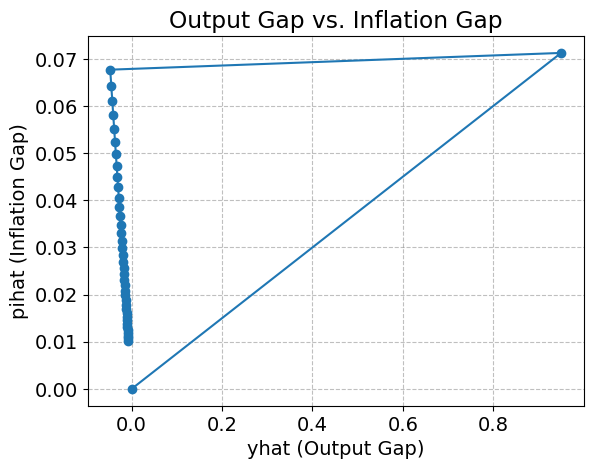

In [2]:
from modelproject import ASAD

asad_model = ASAD(T=100, z=1, s=0)
asad_model.solve_model()

x_values = asad_model.yhat_vec
y_values = asad_model.pihat_vec

plt.plot(x_values, y_values, marker="o")
plt.xlabel("yhat (Output Gap)")
plt.ylabel("pihat (Inflation Gap)")
plt.title("Output Gap vs. Inflation Gap")
plt.grid(True)
plt.show()
